In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### RNNCell结构实现

In [7]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)#input:[N,26]+[N,hidden_size]=N,26+hidden_size -> N*hidden_size
        hidden = self.i2h(combined) #N*hidden_size，这里计算了一个hidden，hidden会带来下一个combined里
        output = self.i2o(combined) # N*output_size,就是一个普通全连接层
        output = self.softmax(output)#softmax
        return output, hidden
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [8]:
#隐藏层神经元个数
n_hidden = 10
#分类类别数
target_size = 2
#输入长度，以字符英文字符为例，英文字符个数为26
input_size=26
#实例化RNN
rnn = RNN(input_size, n_hidden, target_size)
#初始化隐藏状态，初始为0
hidden = rnn.initHidden()
#构造输入
input = torch.randint(0,input_size,(1,input_size)).float()
print(input)
print(input.shape)
output, next_hidden = rnn(input, hidden)#得到[1*10,1*128]
print(output.data.size(),next_hidden.data.size())

tensor([[ 9., 15., 24., 23.,  1.,  5., 22., 12., 16., 23., 19.,  4.,  5., 19.,
          5.,  5.,  4., 16., 15., 10., 13., 24., 17.,  5., 19.,  7.]])
torch.Size([1, 26])
torch.Size([1, 2]) torch.Size([1, 10])


### Pytorch的RNN类

### 使用sin预测cos

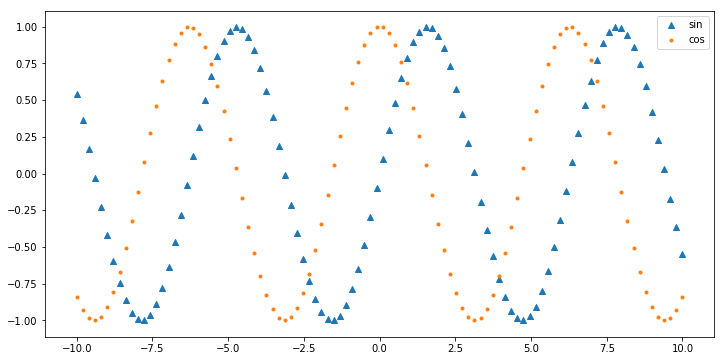

In [10]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
steps = np.linspace(-10, 10, 100, dtype=np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)
plt.scatter(steps,x_np,marker="^")
plt.scatter(steps,y_np,marker=".")
plt.legend(["sin","cos"])
plt.show()

In [11]:
bins = 50           # RNN时间步长
input_dim = 1       # RNN输入尺寸
lr = 0.01           # 初始学习率
epochs = 10000       # 轮数
hidden_size=64      # 隐藏层神经元个数
num_layers = 2      # 神经元层数
nonlinearity="relu" #只支持relu和tanh

In [12]:
class RNNDemo(nn.Module):
    def __init__(self,input_dim,hidden_size,num_layers,nonlinearity):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.nonlinearity = nonlinearity
        self.rnn = nn.RNN(
            input_size=input_dim,
            hidden_size=hidden_size,
            num_layers=num_layers,
            nonlinearity=nonlinearity
        )
        self.out = nn.Linear(hidden_size, 1)
    def forward(self, x, h):
        r_out, h_state = self.rnn(x,h)
        outs = [] 
        for record in range(r_out.size(1)):
            outs.append(self.out(r_out[:, record, :]))
        return torch.stack(outs, dim=1), h_state


loss:0.50047952
loss:0.39752430
loss:0.41736990
loss:0.36897498
loss:0.31206673
loss:0.78804320
loss:0.25809062
loss:0.19665539
loss:0.14445339
loss:0.08041897
loss:0.50233680
loss:0.48289770
loss:0.36406177
loss:0.21484376
loss:0.22689199
loss:0.21282002
loss:0.50549072
loss:0.50053990
loss:0.49695641
loss:0.49520889
loss:0.49320552
loss:0.48983940
loss:0.48450744
loss:0.46795535
loss:0.40585262
loss:6.36657667
loss:0.38486305
loss:0.50129169
loss:0.50069618
loss:0.50006610
loss:0.49957126
loss:0.49921104
loss:0.49876413
loss:0.49800161
loss:0.49723935
loss:0.49615839
loss:0.49461499
loss:0.49283111
loss:0.48967379
loss:0.48405108
loss:0.47068140
loss:0.42102221
loss:0.06667027
loss:0.49984738
loss:0.50058496
loss:0.50037903
loss:0.49694893
loss:0.48992100
loss:0.48677573
loss:0.48913416
loss:0.50582838
loss:0.49045360
loss:0.49112642
loss:0.47675002
loss:0.97081363
loss:0.51373130
loss:0.49823454
loss:0.49846229
loss:0.49854097
loss:0.49830651
loss:0.49823821
loss:0.49813244
loss:0.4

loss:0.49691859
loss:0.49745181
loss:0.49858573
loss:0.49516729
loss:0.49266168
loss:0.48166117
loss:0.50851989
loss:0.50052094
loss:0.49851650
loss:0.49845320
loss:0.49569786
loss:0.47289345
loss:0.46524784
loss:0.61343443
loss:0.53336549
loss:0.51058894
loss:0.49953353
loss:0.50299048
loss:0.50226015
loss:0.50041449
loss:0.49984351
loss:0.50000334
loss:0.50040478
loss:0.50114810
loss:0.62152404
loss:0.53563136
loss:0.50912577
loss:0.50083923
loss:0.49797943
loss:0.49439791
loss:0.49266213
loss:0.48919380
loss:0.45276392
loss:0.43089336
loss:0.36177573
loss:0.33545923
loss:0.73889196
loss:0.57890481
loss:0.50396591
loss:0.49627841
loss:0.49688810
loss:0.47620565
loss:0.44524342
loss:0.47761804
loss:0.47860298
loss:0.46103689
loss:0.38875166
loss:0.28881389
loss:0.62566566
loss:0.49824995
loss:0.49757189
loss:0.50957495
loss:0.51199269
loss:0.50419396
loss:0.49527326
loss:0.48978719
loss:0.48732489
loss:0.48519504
loss:0.48126850
loss:0.47684795
loss:0.47179374
loss:0.46763983
loss:0.4

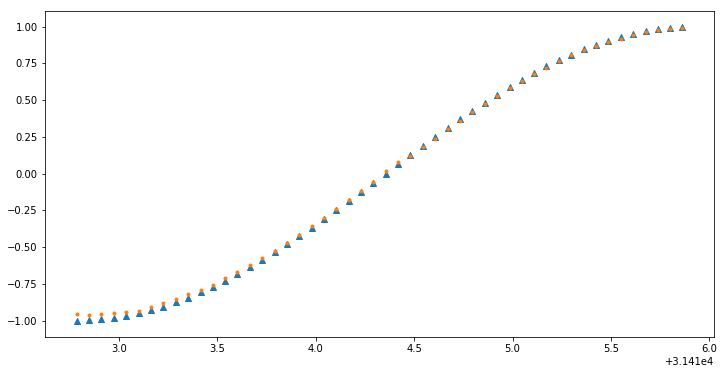

In [13]:
rnnDemo = RNNDemo(input_dim,hidden_size,num_layers,nonlinearity)
optimizer = torch.optim.Adam(rnnDemo.parameters(), lr=lr)
loss_func = nn.MSELoss()

h_state = None
for step in range(epochs):
    start, end = step * np.pi, (step + 1) * np.pi  # 时间跨度
    # 使用Sin函数预测Cos函数
    steps = np.linspace(start, end, bins, dtype=np.float32, endpoint=False)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    x = torch.from_numpy(x_np).unsqueeze(1).unsqueeze(2)#【100，1,1】尺寸大小为(time_step, batch, input_size)
    y = torch.from_numpy(y_np).unsqueeze(1).unsqueeze(2)#【100，1,1】
    prediction, h_state = rnnDemo(x, h_state)  # RNN输出（预测结果，隐藏状态）
    #将每一次输出的中间状态传递下去(不带梯度)
    h_state = h_state.detach()  
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(step%10==0):
        print("loss:{:.8f}".format(loss))

plt.figure(figsize=(12,6))
plt.scatter(steps,y_np,marker="^")
plt.scatter(steps, prediction.data.numpy().flatten(),marker=".")
plt.show()

#### LSTM

In [14]:
class LstmDemo(nn.Module):
    def __init__(self,input_dim,hidden_size,num_layers):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_size,
            num_layers=num_layers
        )
        self.out = nn.Linear(hidden_size, 1)

    def forward(self, x, h_0_c_0):
        r_out, h_state = self.lstm(x,h_0_c_0)
        outs = [] 
        #r_out:(h_n, c_n)
        for record in range(r_out.size(1)):
            outs.append(self.out(r_out[:, record, :]))
        return torch.stack(outs, dim=1), h_state

loss:0.51717800
loss:0.50065255
loss:0.49995759
loss:0.47315955
loss:0.50064230
loss:0.57572514
loss:0.01025884
loss:0.00062259
loss:0.00181259
loss:0.00138456
loss:0.00026689
loss:0.00006099
loss:0.00056895
loss:0.00005902
loss:0.00075268
loss:0.00029600
loss:0.00080693
loss:0.00045928
loss:0.00088534
loss:0.00083844
loss:0.00012703
loss:0.00015219
loss:0.00076467
loss:0.00117184
loss:0.00037389
loss:0.00045633
loss:0.00069958
loss:0.00003411
loss:0.00031411
loss:0.00015287
loss:0.00020209
loss:0.00045334
loss:0.00065083
loss:0.00003659
loss:0.00067867
loss:0.00016141
loss:0.00075547
loss:0.00034406
loss:0.00066487
loss:0.00051539
loss:0.00048299
loss:0.00074988
loss:0.00012824
loss:0.00082202
loss:0.00072793
loss:0.00000855
loss:0.00003252
loss:0.00079097
loss:0.00059037
loss:0.00058158
loss:0.00071064
loss:0.00061476
loss:0.00027594
loss:0.00019050
loss:0.00062342
loss:0.00073978
loss:0.00061647
loss:0.00011231
loss:0.00000999
loss:0.00001152
loss:0.00065350
loss:0.00020106
loss:0.0

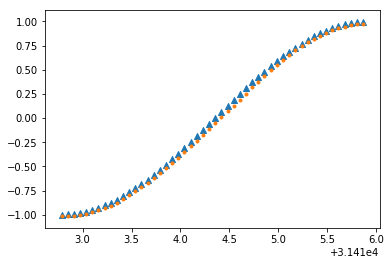

In [15]:
lstmDemo = LstmDemo(input_dim,hidden_size,num_layers).cuda()
optimizer = torch.optim.Adam(lstmDemo.parameters(), lr=lr)
loss_func = nn.MSELoss()

h_c_state = (torch.zeros(num_layers,1,hidden_size).cuda(),torch.zeros(num_layers,1,hidden_size).cuda())
for step in range(epochs):
    start, end = step * np.pi, (step + 1) * np.pi  # 时间跨度
    # 使用Sin函数预测Cos函数
    steps = np.linspace(start, end, bins, dtype=np.float32, endpoint=False)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    x = torch.from_numpy(x_np).unsqueeze(1).unsqueeze(2).cuda()#【100，1,1】尺寸大小为(time_step, batch, input_size)
    y = torch.from_numpy(y_np).unsqueeze(1).unsqueeze(2).cuda()#【100，1,1】
    prediction, h_state = lstmDemo(x,h_c_state)  # RNN输出（预测结果，隐藏状态）
    #将每一次输出的中间状态传递下去(不带梯度)
    h_c_state = (h_state[0].detach(),h_state[1].detach())
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(step%100==0):
        print("loss:{:.8f}".format(loss))
plt.scatter(steps,y_np,marker="^")
plt.scatter(steps, prediction.cpu().data.numpy().flatten(),marker=".")
plt.show()

### GRU

In [16]:
class GRUDemo(nn.Module):
    def __init__(self,input_dim,hidden_size,num_layers):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(
            input_size=input_dim,
            hidden_size=hidden_size,
            num_layers=num_layers
        )
        self.out = nn.Linear(hidden_size, 1)

    def forward(self, x, h):
        r_out, h_state = self.gru(x,h)
        outs = [] 
        for record in range(r_out.size(1)):
            outs.append(self.out(r_out[:, record, :]))
        return torch.stack(outs, dim=1), h_state


loss:0.50176054
loss:0.00226786
loss:0.00002110
loss:0.00734446
loss:0.00001271
loss:0.00001133
loss:0.00525041
loss:0.00001578
loss:0.00000526
loss:0.00047405
loss:0.00038403
loss:0.00005233
loss:0.01299966
loss:0.00000396
loss:0.00000987
loss:0.00000983
loss:0.00179682
loss:0.00026669
loss:0.00002136
loss:0.00000122
loss:0.00000076
loss:0.00000065
loss:0.00273025
loss:0.00008161
loss:0.00000101
loss:0.00024650
loss:0.00003742
loss:0.00002226
loss:0.00000259
loss:0.00000088
loss:0.00034960
loss:0.00017886
loss:0.00002973
loss:0.00018834
loss:0.00029263
loss:0.00006494
loss:0.00016715
loss:0.00178642
loss:0.50297040
loss:0.12733065
loss:0.00891744
loss:0.00289894
loss:0.00046954
loss:0.00041219
loss:0.00169624
loss:0.00013055
loss:0.00030379
loss:0.00054660
loss:0.00002946
loss:0.00008561
loss:0.00295883
loss:0.00280066
loss:0.00009799
loss:0.00000955
loss:0.00001924
loss:0.00011282
loss:0.03090166
loss:0.00353032
loss:0.00003653
loss:0.00002000
loss:0.00001959
loss:0.00001776
loss:0.0

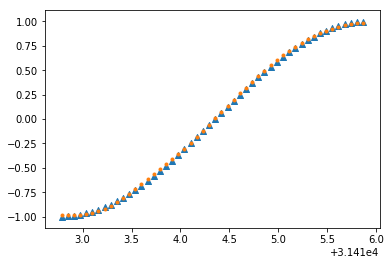

In [17]:
gruDemo = GRUDemo(input_dim,hidden_size,num_layers).cuda()
optimizer = torch.optim.Adam(gruDemo.parameters(), lr=lr)
loss_func = nn.MSELoss()

c_state = torch.zeros(num_layers*1,1,hidden_size).cuda()
for step in range(epochs):
    start, end = step * np.pi, (step + 1) * np.pi  # 时间跨度
    # 使用Sin函数预测Cos函数
    steps = np.linspace(start, end, bins, dtype=np.float32, endpoint=False)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    x = torch.from_numpy(x_np).unsqueeze(1).unsqueeze(2).cuda()#【100，1,1】尺寸大小为(time_step, batch, input_size)
    y = torch.from_numpy(y_np).unsqueeze(1).unsqueeze(2).cuda()#【100，1,1】
    prediction, c_state = gruDemo(x, c_state)  # RNN输出（预测结果，隐藏状态）
    #将每一次输出的中间状态传递下去(不带梯度)
    c_state = c_state.detach()  
    loss = loss_func(prediction, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if(step%100==0):
        print("loss:{:.8f}".format(loss))
plt.scatter(steps,y_np,marker="^")
plt.scatter(steps, prediction.cpu().data.numpy().flatten(),marker=".")
plt.show()

In [317]:
test = nn.Linear(10,20)

In [318]:
test.weight.shape

torch.Size([20, 10])